In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk, pylab
import string

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## Task A

In [85]:
#Read in data
comments_df = pd.read_csv('comments_data_complete.csv')
comments_df.head()

,date,comment
0,3/25/2002 5:54,I personally think that with a few tweaks the ...
1,3/25/2002 7:06,I am debating a new purchase and these two are...
2,3/25/2002 17:02,"Great handling, RWD, excellent engine and the ..."
3,3/25/2002 23:04,And no manual tranny. That may not matter to y...
4,3/26/2002 0:44,One beauty of BMW 3 Series is that there are s...


In [86]:
# Generate corpus from list of comments
comment_list = list(comments_df['comment'])
comment_list[1]

"I am debating a new purchase and these two are at the top of my list. The price difference between these two is approx. 6K (non-Type S Acura). Is the ES300 worth 6K over the TL? I don't know because I have never owned a TL but I am familiar with the ES300(previous generation). Supposedly the 2002 ES300 is a lot better than the previous generation but is it that much better than the TL? Of great importance to me is initial quality and overall dependability. Does the TL compare with the ES300 in both of these categorys? I am not familiar with the Honda Co. Are prices lower than Lexus for service work? I would appreciate any input on this dilemma from some TL owners."

In [87]:
def clean_corpus(text):
    #Remove tags
    text = re.sub("[\n]", "" , str(text))
    text = re.sub("[^-9A-Za-z ]*", "" , text)
    return(text)
    
    
#Applying the remove_punctuation function
#comments_df['comment'] = comments_df['comment'].apply(clean_corpus)

In [88]:
comments_df['comment'][1]

"I am debating a new purchase and these two are at the top of my list. The price difference between these two is approx. 6K (non-Type S Acura). Is the ES300 worth 6K over the TL? I don't know because I have never owned a TL but I am familiar with the ES300(previous generation). Supposedly the 2002 ES300 is a lot better than the previous generation but is it that much better than the TL? Of great importance to me is initial quality and overall dependability. Does the TL compare with the ES300 in both of these categorys? I am not familiar with the Honda Co. Are prices lower than Lexus for service work? I would appreciate any input on this dilemma from some TL owners."

In [89]:
#Join list elements to form a text corpus
corpus = ("".join(str(comment_list)))

#Converting all the words into lowercase
corpus = corpus.lower()

In [90]:
corpus = clean_corpus(corpus)


In [92]:
corpus[0:1000]

'i personally think that with a few tweaks the c could also sit at the top of this group its still more of a entry-level luxury sedan than mercedes would lead you to believe the c sport needs to have its suspension retuned to accept  inch tires without a harsh ride mb also needs to stop forcing metal trim and black leather on everyone that wants the sport package the cs -speed wouldnt hurt either if offered on the c though it needs to be fixed firstnnthat said my favorite of the group is gasp the new a  the a easily has the best interior of any sub-k car combine that with stunning looks and a body that is as rigid as any ever made and you have my personal favorite the single thing i dont like about the a is the grey trim around the bottom of the car this trim doesnt match any of the body colors as it should be body color anyway this is an excellent car and in my opinion the best there is under k the upcoming a convertible coupe and s will all be winnersnnthe bmw i is now an old favorit

### Zipf's law

In [93]:
#allWords = nltk.tokenize.word_tokenize(corpus)
#fdist = nltk.FreqDist(corpus.split())
#fdist = nltk.FreqDist(w.lower() for w in allWords)

#Splitting the entire corpus
corpus = nltk.tokenize.word_tokenize(corpus)

In [94]:
nltk.FreqDist(corpus).most_common(10)

[('the', 112728),
 ('a', 57743),
 ('and', 45595),
 ('to', 45364),
 ('i', 44478),
 ('is', 33566),
 ('of', 32151),
 ('in', 28167),
 ('that', 25625),
 ('it', 24666)]

In [112]:
def plot_word_frequency(words,top_n=100):
    """Function to plot the word frequencies"""
    word_freq = nltk.FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    rank = list(range(1,101))
    plt.figure(figsize=(9.5,7.5))
    plt.title("Most Frequent Words in the Corpus - Including Stopwords")
    plt.suptitle(str('Correlation : ')+str((np.corrcoef(np.log(rank),np.log(counts))[0][1]).round(3)))
    plt.xlabel("Log Count")
    plt.ylabel("Log Rank")
    plot = sns.regplot(y = np.log(rank), x = np.log(counts),scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    return plot
    


<AxesSubplot:title={'center':'Most Frequent Words in the Corpus - Including Stopwords'}, xlabel='Log Count', ylabel='Log Rank'>

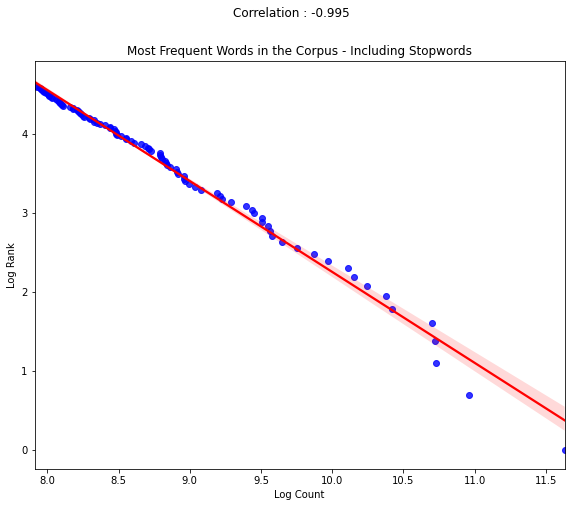

In [113]:
plot_word_frequency(corpus,100)

## Task B

### Remove stop words

In [ ]:
stopwords1 = nltk.corpus.stopwords.words('english')
stopwords2 = nltk.corpus.stopwords.words('%env')


allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    